# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
## Create subarban DFs
suburban_cities_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,1/27/2019 3:08,27.79,6653622887913,11,Suburban
1626,East Kentstad,4/7/2019 19:44,18.75,6575961095852,20,Suburban
1627,Lake Omar,1/17/2019 21:33,21.71,966911700371,22,Suburban
1628,Myersshire,2/27/2019 17:38,17.10,5706770909868,19,Suburban
1629,West Hannah,4/19/2019 1:06,37.78,2273047151891,12,Suburban


In [4]:
##  Create Urban cities DF
urban_cities_df=pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908451377344,46,Urban


In [5]:
## Create rural DFs
rural_cities_df=pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/2019 11:13,43.22,1076079536213,9,Rural
2251,North Holly,2/2/2019 14:54,12.42,1985256326182,8,Rural
2252,Michaelberg,3/27/2019 18:27,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2/23/2019 21:12,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,5/6/2019 8:57,51.80,4018025271936,2,Rural


In [6]:
#  1. Get the total rides for each city type

total_rides_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
#total_rides_count.head()

print(total_rides_count)

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64


In [7]:
# 2. Get the total drivers for each city type
total_driver_count = pyber_data_df.groupby(["type"]).sum()["driver_count"]
#total_driver_count.head()

print(total_driver_count)


type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64


In [8]:
#  3. Get the total amount of fares for each city type
total_fare_count = pyber_data_df.groupby(["type"]).sum()["fare"]

print(total_fare_count)


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64


In [9]:
#  4. Get the average fare per ride for each city type.

average_fare_count = total_fare_count/total_rides_count

print(average_fare_count)


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64


In [10]:
# 5. Get the average fare per driver for each city type. 

average_fare_per_driver = total_fare_count/total_driver_count

print(average_fare_per_driver)

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64


In [11]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_data_df=pd.DataFrame({
    "City Types" : type,
    "Total Rides" : total_rides_count,
    "Total Drivers":total_driver_count,
    "Total Fares": total_fare_count,
    "Average Fare per Ride":average_fare_count,
    "Average Fare per Driver": average_fare_per_driver})
pyber_summary_data_df

,City Types,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,,
Rural,<class 'type'>,125,537,4327.93,34.623440,8.059460
Suburban,<class 'type'>,625,8570,19356.33,30.970128,2.258615
Urban,<class 'type'>,1625,59602,39854.38,24.525772,0.668675


In [12]:
#  7. Cleaning up the DataFrame. Delete the index name

pyber_summary_data_df.index.name = None

In [13]:
#  8. Format the columns.

pyber_summary_data_df["Total Fares"] = pyber_summary_data_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_data_df["Average Fare per ride"] = pyber_summary_data_df["Average Fare per Ride"].map("{:,.2f}".format)
pyber_summary_data_df["Average Fare per Driver"] = pyber_summary_data_df["Average Fare per Driver"].map("{:,.2f}".format)

pyber_summary_data_df


,City Types,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver,Average Fare per ride
Rural,<class 'type'>,125,537,"$4,327.93",34.623440,8.06,34.62
Suburban,<class 'type'>,625,8570,"$19,356.33",30.970128,2.26,30.97
Urban,<class 'type'>,1625,59602,"$39,854.38",24.525772,0.67,24.53


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [14]:
# 1. Read the merged DataFrame

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908451377344,46,Urban


In [15]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
df = pyber_data_df.groupby(["type","date"]).sum()["fare"]
df

type   date           
Rural  1/1/2019 9:45      43.69
       1/11/2019 4:39     16.42
       1/14/2019 15:58    54.10
       1/14/2019 7:09     18.05
       1/15/2019 21:44    30.26
                          ...  
Urban  5/8/2019 1:54      32.69
       5/8/2019 2:31      41.33
       5/8/2019 4:20      21.99
       5/8/2019 4:39      18.45
       5/8/2019 7:29      18.55
Name: fare, Length: 2364, dtype: float64

In [17]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_pivot = df.reset_index()

In [19]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare'
pyber_pivot = pd.pivot_table(pyber_pivot, values='fare', index = 'date', columns ='type')

pyber_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
1/1/2019 14:52,NaN,31.15,NaN
1/1/2019 17:22,NaN,NaN,42.11
1/1/2019 21:04,NaN,NaN,11.71
1/1/2019 2:07,NaN,24.07,NaN


In [20]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
challenge_pivot = pyber_pivot.loc["1/1/2019":"4/29/2019"] 
challenge_pivot

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
4/28/2019 4:34,NaN,NaN,40.46
4/28/2019 8:15,NaN,NaN,22.86
4/28/2019 9:03,NaN,NaN,15.00


In [23]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
challenge_pivot.index = pd.to_datetime(challenge_pivot.index)

# df.index = pd.to_datetime(df.index)
challenge_pivot.index

DatetimeIndex(['2019-01-01 00:08:00', '2019-01-01 00:46:00',
               '2019-01-01 12:32:00', '2019-01-01 14:40:00',
               '2019-01-01 14:42:00', '2019-01-01 14:52:00',
               '2019-01-01 17:22:00', '2019-01-01 21:04:00',
               '2019-01-01 02:07:00', '2019-01-01 03:46:00',
               ...
               '2019-04-28 17:38:00', '2019-04-28 19:35:00',
               '2019-04-28 02:38:00', '2019-04-28 04:00:00',
               '2019-04-28 04:21:00', '2019-04-28 04:34:00',
               '2019-04-28 08:15:00', '2019-04-28 09:03:00',
               '2019-04-28 09:10:00', '2019-04-28 09:25:00'],
              dtype='datetime64[ns]', name='date', length=2057, freq=None)

In [24]:
# 7. Check that the datatype for the index is datetime using df.info()
challenge_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2057 entries, 2019-01-01 00:08:00 to 2019-04-28 09:25:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     105 non-null    float64
 1   Suburban  538 non-null    float64
 2   Urban     1416 non-null   float64
dtypes: float64(3)
memory usage: 64.3 KB


In [25]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
df = challenge_pivot.resample('W').sum()
df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


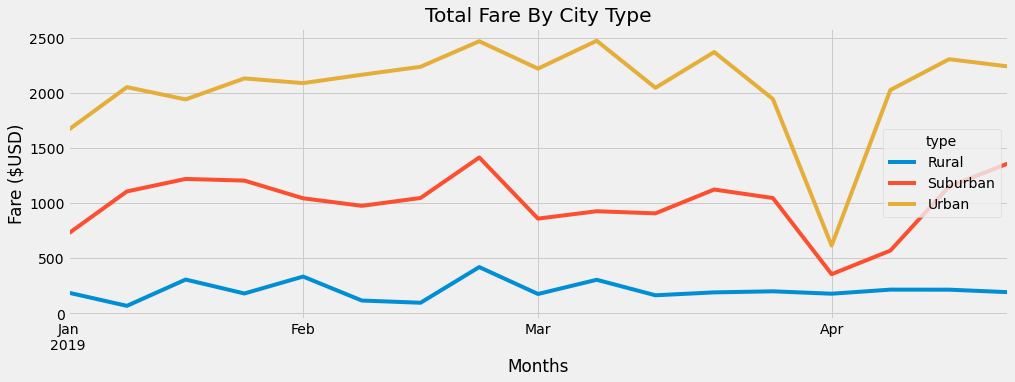

In [30]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
df.plot(figsize = (15,5))
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.title("Total Fare By City Type")
plt.ylabel("Fare ($USD)")
plt.xlabel("Months")

plt.savefig("resources/PyBer_fare_summary.png",dpi= 300, bbox_inches='tight')